In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Bank_America = pd.read_csv("Bank_of_America_data.csv")
german_Bank = pd.read_table("german_new.data",sep=" ")
taiwan_Bank = pd.read_excel("default of credit card clients.xls",header=1,index_col=0)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


# Classification: K-MEANS++, CAH et DBSCAN

### I/ K-MEANS++

In [10]:
x=taiwan_Bank_Final.values
x

array([[ 20000,     24,      2, ...,      1,      0,      0],
       [120000,     26,     -1, ...,      1,      0,      0],
       [ 90000,     34,     -1, ...,      1,      0,      0],
       ...,
       [ 30000,     37,      4, ...,      1,      0,      0],
       [ 80000,     41,      1, ...,      0,      1,      0],
       [ 50000,     46,     -1, ...,      1,      0,      0]], dtype=int64)

In [11]:
# Application du Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(taiwan_Bank_Final)
y_kmeans= kmeans.fit_predict(taiwan_Bank_Final)
#correspondance les vrais labels avec les groupes de la CAH 
pd.crosstab(cible_taiwan, kmeans.labels_)

col_0,0,1
default payment next month,,
0,19983,3381
1,5862,774


On peut déduire que notre Kmeans divise nos individus en deux clusters tel que le cluster 0 represente les mauvais clients (19983) et le cluster 1 les bons clients (774)

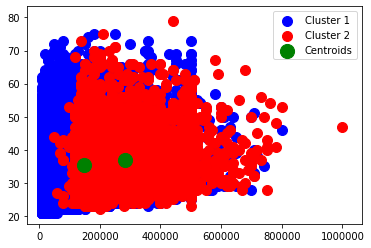

In [12]:
# Affichage des deux clusters qu'on a obtenu à partir du Kmeans
plt.scatter(taiwan_Bank_Final.values[y_kmeans == 0, 0], taiwan_Bank_Final.values[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(taiwan_Bank_Final.values[y_kmeans == 1, 0], taiwan_Bank_Final.values[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

In [13]:
#Evaluation du Kmeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics
metrics.adjusted_rand_score(cible_taiwan,kmeans.labels_) 

-0.018190949541530502

## II/ CAH

In [14]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

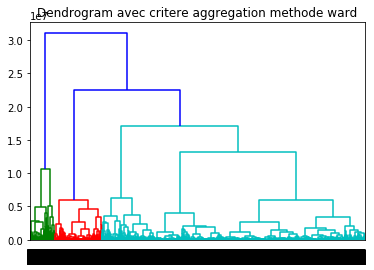

In [15]:
# CAH avec méthode ward et affichage du dendrogram
matrice=linkage(taiwan_Bank_Final,method='ward',metric='euclidean')
dendrogram(matrice);
plt.title('Dendrogram avec critere aggregation methode ward')
plt.show()

In [16]:
# CAH avec méthode average et affichage du dendrogram
matrice1= linkage(taiwan_Bank_Final, 'average') 
dendrogram(matrice1)
plt.title('Dendrogram avec critere aggregation moyenne')
plt.show()

KeyboardInterrupt: 

In [ ]:
# CAH avec méthode single et affichage du dendrogram
matrice2 = linkage(taiwan_Bank_Final, 'single') 
dendrogram(matrice2)
plt.title('Dendrogram avec critere aggregation distance minimale')
plt.show()

In [ ]:
# CAH avec méthode complete et affichage du dendrogram
matrice3=linkage(taiwan_Bank_Final, 'complete')
dendrogram(matrice3)
plt.title('Dendrogram avec critere aggregation distance maximale')
plt.show()

In [17]:
#Couper le dendrogramme
groupes_cah = fcluster(matrice,t=25000000,criterion='distance') 
print(groupes_cah)

[2 2 2 ... 2 2 2]


In [18]:
#correspondance les vrais labels avec les groupes de la CAH 
pd.crosstab(cible_taiwan,groupes_cah)

col_0,1,2
default payment next month,,
0,1737,21627
1,461,6175


On peut déduire que notre CAH divise nos individus en deux clusters tel que le cluster 1 represente les bons clients (461) et le cluster 2 les bons clients (21627)

## III/ DBScan

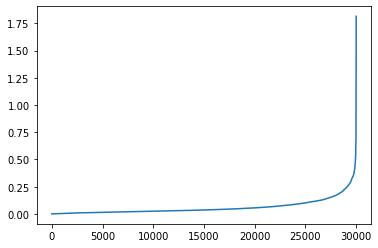

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
taiwan_Bank_Final_Scaled=min_max_scaler.fit_transform(taiwan_Bank_Final)
nbrs=NearestNeighbors(n_neighbors=2,algorithm='ball_tree').fit(taiwan_Bank_Final_Scaled)
distances, indices=nbrs.kneighbors(taiwan_Bank_Final_Scaled)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)


In [30]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.3,min_samples=3).fit(taiwan_Bank_Final)
labels=db.labels_
pd.crosstab(cible_taiwan,labels)

col_0,-1,0,1,2,3
default payment next month,,,,,
0,23357,2,2,1,2
1,6631,1,1,2,1


On peut rien déduire à partir du crosstab du DBScan puisque ce modèle groupe nos individus dans le meme cluster -1 (et ce cluster représente les individus les mals représentés)

## Profiling (Caracteristiques de chaque groupes en utilisant le modèle Kmeans)

In [97]:
# Chercher un comportement type (profil) des clusters 
taiwan_Bank_Kmeans=taiwan_Bank_Final
taiwan_Bank_Kmeans["Cible_Kmeans"] = kmeans.labels_


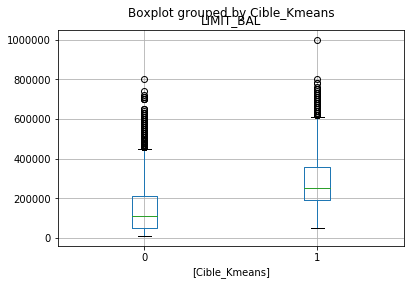

In [104]:
# Affichage du comportement de chaque cluster par rapport la variable "LIMIT_BAL"
taiwan_Bank_Kmeans.boxplot(by = ["Cible_Kmeans"], column = ["LIMIT_BAL"]);

On peut dire qu'il ya plusieurs points abérants dans les deux clusters.
Pour le cluster 0 (Mauvais clients):
la majorité des individus ont une valeur de LIMIT_BAL<200000.
Tandis que pour le cluster 1(Bons clients):
la majorité des individus ont une valeur de LIMIT_BAL>200000.
On peut aussi dire que le Q3 du cluster 0 se concide avec le Q1 du cluster 1. 

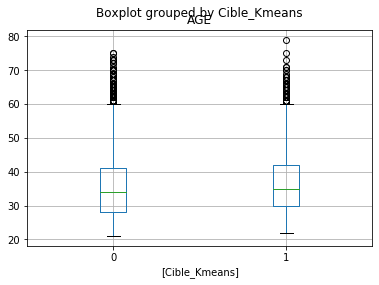

In [105]:
# Affichage du comportement de chaque cluster par rapport la variable "AGE"
taiwan_Bank_Kmeans.boxplot(by = ["Cible_Kmeans"], column = ["AGE"]);

On peut dire qu'il ya plusieurs points abérants dans les deux clusters.
Pour le cluster 0 (Mauvais clients):
la majorité des individus ont une valeur de AGE entre 28 et 41.
Tandis que pour le cluster 1(Bons clients):
la majorité des individus ont une valeur de AGE entre 30 et 43.
Donc on peut dire que les individus qui ont un age inférieur à 30 sont forcément des mauvais clients. 
Tandis que les individus qui ont un age supérieur à 41 sont forcément des bons clients.

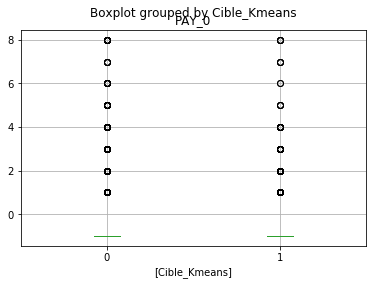

In [106]:
# Affichage du comportement de chaque cluster par rapport la variable "PAY_0" et de mème pour les autres
taiwan_Bank_Kmeans.boxplot(by = ["Cible_Kmeans"], column = ["PAY_0"]);

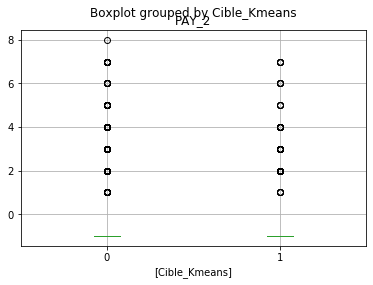

In [107]:
taiwan_Bank_Kmeans.boxplot(by = ["Cible_Kmeans"], column = ["PAY_2"]);

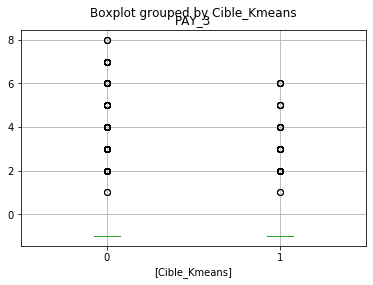

In [108]:
taiwan_Bank_Kmeans.boxplot(by = ["Cible_Kmeans"], column = ["PAY_3"]);

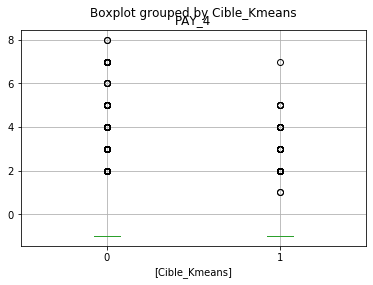

In [109]:
taiwan_Bank_Kmeans.boxplot(by = ["Cible_Kmeans"], column = ["PAY_4"]);

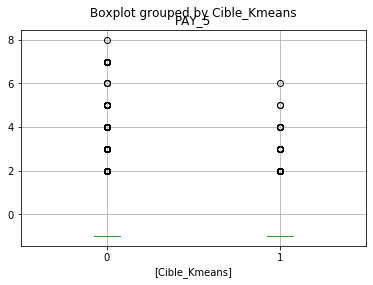

In [110]:
taiwan_Bank_Kmeans.boxplot(by = ["Cible_Kmeans"], column = ["PAY_5"]);

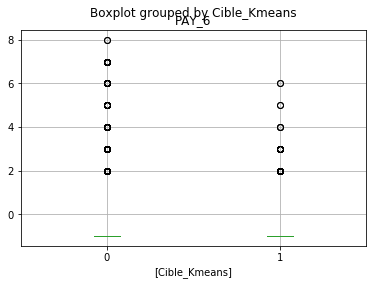

In [127]:
taiwan_Bank_Kmeans.boxplot(by = ["Cible_Kmeans"], column = ["PAY_6"]);

On peut rien dire d'après ces boxplots.

# Prédiction (modèles supervisés)

### I/ KNN

In [31]:
# Diviser les individus en des individus d'entrainement et de test(avec pourcentage de test 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(taiwan_Bank_Final, cible_taiwan, random_state = 0)

In [32]:
# Centrage et réduction
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
# Choisir le meilleur k
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erreur')

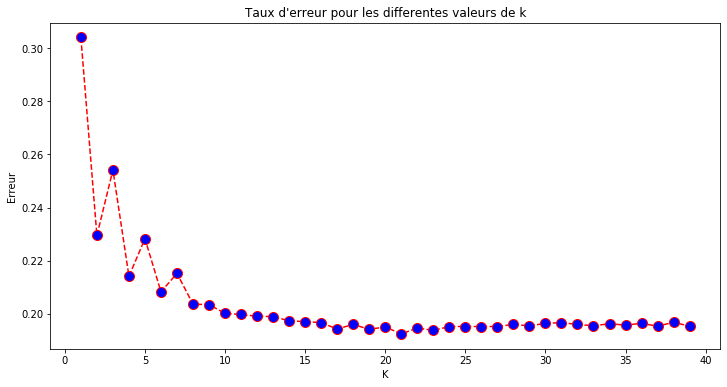

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [35]:
# Le meilleur k est 21 (min erreur)
knn = KNeighborsClassifier(21)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Afficher le score de ce modèle
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

# Affichage du tableau d'évaluation (Precision,Recall, f1-score et support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.81
[[5618  250]
 [1193  439]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5868
           1       0.64      0.27      0.38      1632

    accuracy                           0.81      7500
   macro avg       0.73      0.61      0.63      7500
weighted avg       0.78      0.81      0.78      7500



# II/ Les arbres de décision: CART et Random Forest

## 1/CART

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [37]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))
# Afficher le score de ce modèle
# Matrice de confusion
# Affichage du tableau d'évaluation (Precision,Recall, f1-score et support)

Accuracy of CART classifier on training set: 0.82
Accuracy of CART classifier on test set: 0.81
[[3668 2200]
 [ 845  787]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      5868
           1       0.26      0.48      0.34      1632

    accuracy                           0.59      7500
   macro avg       0.54      0.55      0.52      7500
weighted avg       0.69      0.59      0.63      7500



## 2/Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

In [39]:
# Afficher le score de ce modèle
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

# Affichage du tableau d'évaluation (Precision,Recall, f1-score et support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))


Accuracy of Random Forest classifier on training set: 0.82
Accuracy of Random Forest classifier on test set: 0.81
[[5664  204]
 [1380  252]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5868
           1       0.55      0.15      0.24      1632

    accuracy                           0.79      7500
   macro avg       0.68      0.56      0.56      7500
weighted avg       0.75      0.79      0.74      7500



## III/ SGDClassifier

In [43]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd_model=sgd.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)


In [44]:
# Afficher le score de ce modèle
print('Accuracy of SGDClassifier on training set: {:.2f}'
     .format(sgd.score(X_train, y_train)))
print('Accuracy of SGDClassifier on test set: {:.2f}'
     .format(sgd.score(X_test, y_test)))


Accuracy of SGDClassifier on training set: 0.80
Accuracy of SGDClassifier on test set: 0.81


In [46]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_sgd))

# Affichage du tableau d'évaluation (Precision,Recall, f1-score et support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgd))

[[5524  344]
 [1091  541]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5868
           1       0.61      0.33      0.43      1632

    accuracy                           0.81      7500
   macro avg       0.72      0.64      0.66      7500
weighted avg       0.79      0.81      0.79      7500



## IV/ Preceptron

In [47]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron_model=perceptron.fit(X_train, y_train)
y_pred_preceptron = perceptron_model.predict(X_test)

In [48]:
# Afficher le score de ce modèle
print('Accuracy of Preceptron on training set: {:.2f}'
     .format(perceptron.score(X_train, y_train)))
print('Accuracy of Preceptron on test set: {:.2f}'
     .format(perceptron.score(X_test, y_test)))

Accuracy of Preceptron on training set: 0.48
Accuracy of Preceptron on test set: 0.55


In [49]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_preceptron))

# Affichage du tableau d'évaluation (Precision,Recall, f1-score et support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_preceptron))

[[2852 3016]
 [ 393 1239]]
              precision    recall  f1-score   support

           0       0.88      0.49      0.63      5868
           1       0.29      0.76      0.42      1632

    accuracy                           0.55      7500
   macro avg       0.59      0.62      0.52      7500
weighted avg       0.75      0.55      0.58      7500



## V/ Naive_Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian_model=gaussian.fit(X_train, y_train)
y_pred_gaussian = gaussian_model.predict(X_test)

In [51]:
# Afficher le score de ce modèle
print('Accuracy of Naive_Bayes on training set: {:.2f}'
     .format(gaussian.score(X_train, y_train)))
print('Accuracy of Naive_Bayes on test set: {:.2f}'
     .format(gaussian.score(X_test, y_test)))

Accuracy of Naive_Bayes on training set: 0.75
Accuracy of Naive_Bayes on test set: 0.76


In [52]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_gaussian))

# Affichage du tableau d'évaluation (Precision,Recall, f1-score et support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gaussian))

[[4722 1146]
 [ 667  965]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5868
           1       0.46      0.59      0.52      1632

    accuracy                           0.76      7500
   macro avg       0.67      0.70      0.68      7500
weighted avg       0.79      0.76      0.77      7500



## VI/ SVM

In [53]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(probability=True)
svc_model=svc.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [55]:
# Afficher le score de ce modèle
print('Accuracy of SVM on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of SVM on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

Accuracy of SVM on training set: 0.81
Accuracy of SVM on test set: 0.80


In [56]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svc))

# Affichage du tableau d'évaluation (Precision,Recall, f1-score et support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

[[5707  161]
 [1304  328]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      5868
           1       0.67      0.20      0.31      1632

    accuracy                           0.80      7500
   macro avg       0.74      0.59      0.60      7500
weighted avg       0.78      0.80      0.76      7500



### 1/ SVM Linéaire

In [60]:
from sklearn.svm import SVC, LinearSVC
svc1 = SVC(kernel="linear")
svc1_model=svc1.fit(X_train, y_train)
y_pred_svc1 = svc1_model.predict(X_test)

In [61]:
print('Accuracy of SVM on training set: {:.2f}'
     .format(svc1.score(X_train, y_train)))
print('Accuracy of SVM on test set: {:.2f}'
     .format(svc1.score(X_test, y_test)))

Accuracy of SVM on training set: 0.79
Accuracy of SVM on test set: 0.80


In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svc1))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc1))

[[5405  463]
 [1043  589]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      5868
           1       0.56      0.36      0.44      1632

    accuracy                           0.80      7500
   macro avg       0.70      0.64      0.66      7500
weighted avg       0.78      0.80      0.78      7500



### 2/ SVM Poly

### gamma ="auto"

In [66]:
from sklearn.svm import SVC, LinearSVC
svc2 = SVC(kernel="poly",gamma='auto')
svc2_model=svc2.fit(X_train, y_train)
y_pred_svc2 = svc2_model.predict(X_test)

In [67]:
print('Accuracy of SVM on training set: {:.2f}'
     .format(svc2.score(X_train, y_train)))
print('Accuracy of SVM on test set: {:.2f}'
     .format(svc2.score(X_test, y_test)))

Accuracy of SVM on training set: 0.78
Accuracy of SVM on test set: 0.78


In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svc2))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc2))

[[5868    0]
 [1632    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5868
           1       0.00      0.00      0.00      1632

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.69      7500



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On ne peut pas utiliser ce modele avec gamma="auto" parceque precision=0 , recall=0 et f1-score=0

### gamma ="scale"

In [72]:
from sklearn.svm import SVC, LinearSVC
svc3 = SVC(kernel="poly",gamma='scale')
svc3_model=svc3.fit(X_train, y_train)
y_pred_svc3 = svc3_model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svc3))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc3))

[[5703  165]
 [1279  353]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5868
           1       0.68      0.22      0.33      1632

    accuracy                           0.81      7500
   macro avg       0.75      0.59      0.61      7500
weighted avg       0.79      0.81      0.77      7500



# Evaluation

### I/ Tableaux comparatifs

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [85]:
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
acc_svc_line=accuracy_score(y_test, y_pred_svc1)
acc_svc_poly=accuracy_score(y_test, y_pred_svc3)
acc_NB=accuracy_score(y_test, y_pred_gaussian)
acc_knn=accuracy_score(y_test, y_pred_knn)
acc_preceptron=accuracy_score(y_test, y_pred_preceptron)
acc_rfc=accuracy_score(y_test, y_pred_rfc)
acc_sgd=accuracy_score(y_test, y_pred_sgd)
acc_dtc=accuracy_score(y_test, y_pred_dtc)
models = pd.DataFrame({
    'Model': ['Support Vector Machines Lineaire', 'Support Vector Machines Polynomial','KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_svc_line,acc_svc_poly, acc_knn, 
              acc_rfc, acc_NB, acc_preceptron, 
              acc_sgd, acc_dtc]})
models.sort_values(by="Score",ascending=False)

,Model,Score
6,Stochastic Gradient Decent,0.808667
2,KNN,0.807600
1,Support Vector Machines Polynomial,0.807467
0,Support Vector Machines Lineaire,0.799200
3,Random Forest,0.788800
4,Naive Bayes,0.758267
7,Decision Tree,0.594000
5,Perceptron,0.545467


D'après ce tableau, et suivant le critère de l'accuracy on puet dire que le meilleur modèle est Stochastic Gradient Decent (80%)

In [82]:
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le recall
rec_svc_line=recall_score(y_test, y_pred_svc1)
rec_svc_poly=recall_score(y_test, y_pred_svc3)
rec_NB=recall_score(y_test, y_pred_gaussian)
rec_knn=recall_score(y_test, y_pred_knn)
rec_preceptron=recall_score(y_test, y_pred_preceptron)
rec_rfc=recall_score(y_test, y_pred_rfc)
rec_sgd=recall_score(y_test, y_pred_sgd)
rec_dtc=recall_score(y_test, y_pred_dtc)

models = pd.DataFrame({
    'Model': ['Support Vector Machines Lineaire', 'Support Vector Machines Polynomial','KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Recall': [rec_svc_line,rec_svc_poly, rec_knn, 
              rec_rfc, rec_NB, rec_preceptron, 
              rec_sgd, rec_dtc]})
models.sort_values(by="Recall",ascending=False)

,Model,Recall
5,Perceptron,0.759191
4,Naive Bayes,0.591299
7,Decision Tree,0.482230
0,Support Vector Machines Lineaire,0.360907
6,Stochastic Gradient Decent,0.331495
2,KNN,0.268995
1,Support Vector Machines Polynomial,0.216299
3,Random Forest,0.154412


D'après ce tableau, et suivant le critère du recall on puet dire que le meilleur modèle est Perceptron (75%)

In [84]:
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le F1-score
f1s_svc_line=f1_score(y_test, y_pred_svc1)
f1s_svc_poly=f1_score(y_test, y_pred_svc3)
f1s_NB=f1_score(y_test, y_pred_gaussian)
f1s_knn=f1_score(y_test, y_pred_knn)
f1s_preceptron=f1_score(y_test, y_pred_preceptron)
f1s_rfc=f1_score(y_test, y_pred_rfc)
f1s_sgd=f1_score(y_test, y_pred_sgd)
f1s_dtc=f1_score(y_test, y_pred_dtc)

models = pd.DataFrame({
    'Model': ['Support Vector Machines Lineaire', 'Support Vector Machines Polynomial','KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'F1Score': [f1s_svc_line,f1s_svc_poly, f1s_knn, 
              f1s_rfc, f1s_NB, f1s_preceptron, 
              f1s_sgd, f1s_dtc]})
models.sort_values(by="F1Score",ascending=False)

,Model,F1Score
4,Naive Bayes,0.515629
0,Support Vector Machines Lineaire,0.438897
6,Stochastic Gradient Decent,0.429877
5,Perceptron,0.420927
2,KNN,0.378285
7,Decision Tree,0.340766
1,Support Vector Machines Polynomial,0.328372
3,Random Forest,0.241379


D'après ce tableau, et suivant le critère du F1-Score on puet dire que le meilleur modèle est Naive Bayes (50%)

In [87]:
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le precision
pre_svc_line=precision_score(y_test, y_pred_svc1)
pre_svc_poly=precision_score(y_test, y_pred_svc3)
pre_NB=precision_score(y_test, y_pred_gaussian)
pre_knn=precision_score(y_test, y_pred_knn)
pre_preceptron=precision_score(y_test, y_pred_preceptron)
pre_rfc=precision_score(y_test, y_pred_rfc)
pre_sgd=precision_score(y_test, y_pred_sgd)
pre_dtc=precision_score(y_test, y_pred_dtc)

models = pd.DataFrame({
    'Model': ['Support Vector Machines Lineaire', 'Support Vector Machines Polynomial','KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'F1Score': [pre_svc_line,pre_svc_poly, pre_knn, 
              pre_rfc, pre_NB, pre_preceptron, 
              pre_sgd, pre_dtc]})
models.sort_values(by="F1Score",ascending=False)

,Model,F1Score
1,Support Vector Machines Polynomial,0.681467
2,KNN,0.637155
6,Stochastic Gradient Decent,0.611299
0,Support Vector Machines Lineaire,0.559886
3,Random Forest,0.552632
4,Naive Bayes,0.457129
5,Perceptron,0.291187
7,Decision Tree,0.263475


D'après ce tableau, et suivant le critère du precision on puet dire que le meilleur modèle est Support Vector Machines Polynomial (68%)

### II/ Courbe ROC

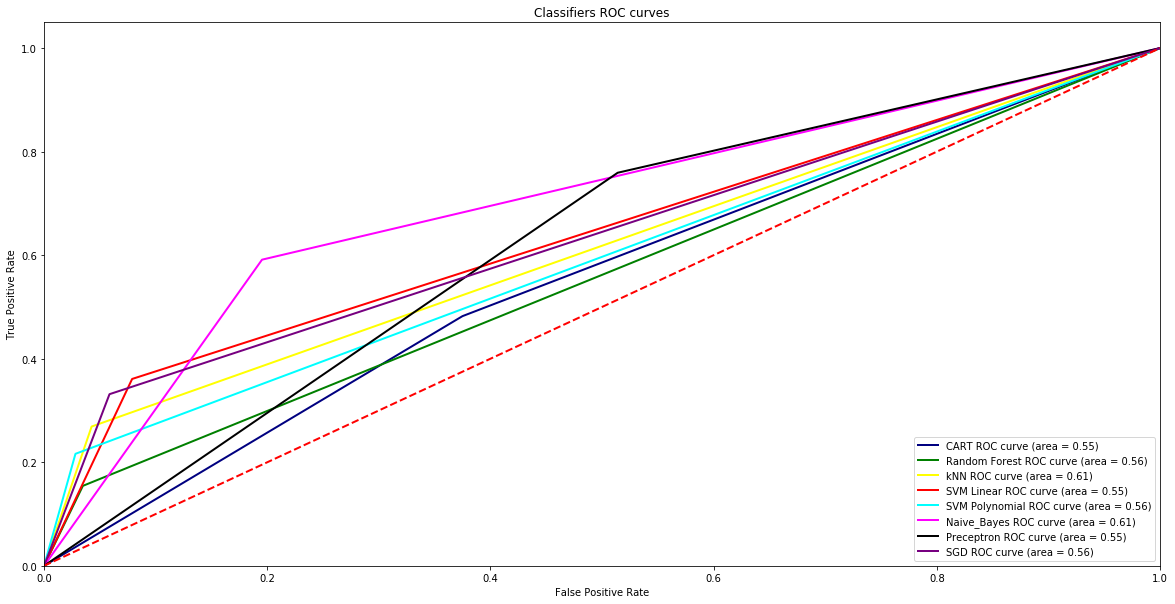

In [93]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

from sklearn.metrics import roc_curve, auc

fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc1) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_svc3) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred_gaussian)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred_preceptron) 
roc_auc7 = auc(fpr7, tpr7)
fpr8, tpr8, threshold8 = roc_curve(y_test, y_pred_sgd)
roc_auc8 = auc(fpr8, tpr8)


plt.figure(figsize=(20,10)) 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)

plt.plot(fpr4, tpr4, color='red', lw=2, label='SVM Linear ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr5, tpr5, color='cyan', lw=2, label='SVM Polynomial ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr6, tpr6, color='magenta', lw=2, label='Naive_Bayes ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr7, tpr7, color='black', lw=2, label='Preceptron ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr8, tpr8, color='#770080', lw=2, label='SGD ROC curve (area = %0.2f)'% roc_auc2)


plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

D'après la courbe ROC on peut déduire que le meilleur modèle est Naive Bayes (area=0.61)

### Interprétation à partir du courbe ROC et des tableaux comparatifs

=> D'après la courbe ROC et des tableaux comparatifs (F1-Score) on peut déduire que le meilleur modèle est Naive Bayes.